Firstly imported the packages required for us.

In [103]:
import pandas as pd
import numpy as np
import requests as req
from tweepy import OAuthHandler
import tweepy
import json
import matplotlib
from timeit import default_timer as timer

Looking through df_enhanced dataset

In [104]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [105]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [106]:
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


df_breed dataset

In [107]:
r = req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

checking the content type and separator

In [108]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [109]:
path = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [110]:
df_breed = pd.read_csv(path, sep = '\t')

In [111]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Below is the list which was used to iterate over tweet ids

In [112]:
tweet_ids = df_enhanced['tweet_id']
tweet_ids

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [11]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Instructions for registering Twitter app and generating access tokens:
# https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [12]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715:

Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989:

Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263:

In [113]:
# Reading the json file

df_full_json = pd.read_json('tweet_json.txt', orient='records', lines = True)

In [114]:
#Lets look into list of columns and based on which we can extract the columns which we are interested
df_full_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [115]:
# This project specifies to exclude retweets, I want to know the status whether a tweet is retweeted or not.
df_tweets = df_full_json[['id','favorite_count', 'retweet_count', 'retweeted']]

In [116]:
df_tweets.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,39467,8853,False
1,892177421306343426,33819,6514,False
2,891815181378084864,25461,4328,False
3,891689557279858688,42908,8964,False
4,891327558926688256,41048,9774,False


In [117]:
df_tweets.tail()

,id,favorite_count,retweet_count,retweeted
2349,666049248165822465,111,41,False
2350,666044226329800704,311,147,False
2351,666033412701032449,128,47,False
2352,666029285002620928,132,48,False
2353,666020888022790149,2535,532,False


# Lets now start with assessing our data

In [118]:
#printing the df_tweets dataset
df_tweets

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,39467,8853,False
1,892177421306343426,33819,6514,False
2,891815181378084864,25461,4328,False
3,891689557279858688,42908,8964,False
4,891327558926688256,41048,9774,False
5,891087950875897856,20562,3261,False
6,890971913173991426,12041,2158,False
7,890729181411237888,56848,16716,False
8,890609185150312448,28226,4429,False
9,890240255349198849,32467,7711,False


In [119]:
#Let me check the dataset if there are any retweets
len(df_tweets.query('retweeted == True'))
#There seems to be no retweets in this file

0

Checking for duplicate tweets if any

In [120]:
df_tweets[df_tweets['id'].duplicated(keep=False)]
#which means there are no tweets with duplicate id's

,id,favorite_count,retweet_count,retweeted


In [121]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(1), int64(3)
memory usage: 75.9 KB


After basic checks with df_tweets data frame, I can assume as of now there are no problems in this dataset.. If any occurs in between we can reiterate to assess


# df_enhanced dataframe

In [122]:
#printing the dataframe/dataset
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


I am grouping the dog name column and finding the invalid dog names, if there exists any. After running the below code and initial observation output, I can assume that the names starting with lower case letters are invalid dog names.

In [123]:
df_enhanced.groupby('name')['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

In [124]:
df_enhanced['name'].describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [125]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [126]:
#checking for duplicate for tweet ids in enhanced df
df_enhanced[df_enhanced['tweet_id'].duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# assessing df_breed dataset 

In [127]:
df_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [128]:
#checking for data types
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [129]:
#looking for any null values if they exists
nulls = df_breed.columns[df_breed.isnull().any()]
df_breed[nulls].isnull().sum()

Series([], dtype: float64)

# Observations noted on assessing

Tidiness:

1. There are 3 datasets instead of single dataset with all the details.

df_enhanced
1. Multiple stage columns, which could have been conveyed in single column.

df_breed:
1. Multiple stage columns, which could have been conveyed in single column.

Quality:

df_enhanced
1. the dog_stage column is having string datatype
2. The rating column having two different for numerator and denominator without proper scaling.
3. Incorrect names,missing names in name column, such as a, an, the... (all names starting with lower case letters)
4. retweeted records: retweeted_status_id, retweeted_user_id, retweeted_status_timestamp
5. missing data in name and stages columns showing as 'None'
6. Time stamp is string datatype, which is not correct
7. in_reply_to__status_id, in_reply_to_user_id should be changed from scientific float to string data type
8. Some rating numerators were extracted from text column
9. There are few columns whose readability has to be improved, ex source column

df_breed:
1. The breed names starting with lower case letter
2. non-dog records in the dataset (ex:- desktop computer, box turtle etc)
3. the appropriate data type for columns p1., p2, p3 should be categorical.
4. Few columns can be removed which are not required.



# Cleaning

## lets start with df_enhanced

## Define

As we are analyzing only original ratings, i.e, original tweets.. I Will filter the data frame without retweets using query

# Code

In [131]:
#Counting the number of retweets in edf_enhanced
len(df_enhanced.query('retweeted_status_id != "NaN"'))
#copying original dataframe to df_enhanced_orig for better purposes:
df_enhanced_orig = df_enhanced.copy()

In [133]:
#using query filtered the data frame with only original tweets
df_enhanced = df_enhanced.query('retweeted_status_id == "NaN"')

# Test

In [134]:
#Verifying if all retweets were removed 
len(df_enhanced.query('retweeted_status_id != "NaN"'))

0

In [135]:
#As we have now removed all retweets, we shall also removed columns pertaining to retweets
df_enhanced = df_enhanced.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

# Define

The rating columns with different for numerator & denominator

# Code

In [136]:
# I dropped the denominator column and added this is a scale to numerator column in title
# Renamed the numerator column to include the rating denominator
df_enhanced  = df_enhanced.drop('rating_denominator', axis=1)

In [137]:
df_enhanced = df_enhanced.rename(index=str, columns={"rating_numerator": "rating_10_scale"})

# Test

In [138]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None


# Define

There are incorrect values in rating_10_scale column (Decimals are shown as integers)

# Code

In [139]:
# Changing the data type of column
df_enhanced['rating_10_scale'] = df_enhanced['rating_10_scale'].astype('float')

In [140]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 237.9+ KB


In [141]:
# saving values into data frame where text contains decimals
df_bad_numerator = df_enhanced[df_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")]

# creating a list to append the extracted values
numerator = []
for item in df_bad_numerator['text']:
    splitted = item.split('/')
    numerator.append(splitted[0].split()[-1])
print(numerator)    

['13.5', '9.75', '11.27', '9.5', '11.26']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [142]:
#Save the corresponding tweet ids into a different list
tweet_id_list = df_bad_numerator['tweet_id'].tolist()

for i in range(len(tweet_id_list)):
    #replacing the correct numerator in original data frame
    df_enhanced.loc[(df_enhanced['tweet_id'] == tweet_id_list[i]), ['rating_10_scale']] = numerator[i] 
    #testing here only to see the replaced values in original dataframe
    print(df_enhanced.loc[(df_enhanced['tweet_id'] == tweet_id_list[i]), ['rating_10_scale']])

   rating_10_scale
45            13.5
    rating_10_scale
695            9.75
    rating_10_scale
763           11.27
     rating_10_scale
1689             9.5
     rating_10_scale
1712           11.26


In [143]:
## Double checking by seeing data types using info()
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 237.9+ KB


# Define

Issues regarding name column: incorrect values, marked as None and missing values

# Code

The best way to get the correct dog names is from the text columns, point to be remembered here is the valid dogs names starts with upper case letters.

I have collected some of the phrases when the dog names occur in the text column:
- ..... named [Dog Name]
- ..... name is [Dog Name]
- This is [Dog Name]
- Say hello to [Dog Name]
- Meet [Dog Name]
- Here we have [Dog Name]
- Here is [Dog Name]

### I will iterate through the text column for this matches and will replace the name columns based on this

In [144]:
import re

#creating two lists: one for the names we can extract and other for new names
names_clean = []
missing_names = []

#create a list of the texts
text_list = df_enhanced['text'].values.tolist()

#create a regex pattern
pattern = re.compile('([A-Z].*)')

#nOW, looping thru the text list and check if the content and pattern correspond to some of the expressions

for text in df_enhanced['text']:
    
    if text.__contains__('This is') and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split(" ")[2].strip('.').strip(','))
    elif text.startswith("Meet") and pattern.fullmatch(text.split(" ")[1]):
        names_clean.append(text.split(" ")[1].strip('.').strip(','))
    elif text.startswith("Here we have") and pattern.fullmatch(text.split(" ", 3)[3]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    elif text.split(" ").__contains__("named") and pattern.fullmatch(text.split()[text.split().index("named")+1]):
        names_clean.append(text.split()[text.split().index("named")+1].strip('.').strip(','))
    elif text.__contains__("name is") and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split()[text.split().index("is")+1].strip('.').strip(','))
    elif text.__contains__("Say hello to") and pattern.fullmatch(text.split()[text.split().index("to")+1]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    else:
        names_clean.append("NaN")
        missing_names.append(text)

# Testing

In [145]:
len(names_clean)

2175

In [146]:
len(missing_names)

755

In [147]:
# I am just looking over missing names if I can extract any other dog names
missing_names

["Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 "Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm",
 "I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
 'You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV',
 'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp',
 '@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution',
 'Here we have a corgi underc

In [148]:
# After the above checks, I'm saving the new names into dataframe
df_enhanced['dog_name'] = names_clean

In [149]:
len(df_enhanced['dog_name'])

2175

In [150]:
# I will now compare the the original names with the new names(ie., cleaned names)
df_enhanced[['name']].groupby(['name'])['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            4
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           1
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old    

In [151]:
df_enhanced[['dog_name']].groupby(['dog_name'])['dog_name'].size()

dog_name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfonso         1
Alfredo         1
Alfy            1
Alice           2
Alphred         1
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
               ..
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Wylie           1
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Zeus            2
Ziva            1
Zoe             1
Z

In [152]:
#At the bottom of the list i could still see few incorrect names, I will replace these names with NA
df_enhanced['dog_name'] = df_enhanced['dog_name'].replace(to_replace = r'^([a-z])', value = np.nan, regex = True)

In [153]:
#Result after the replacing of incorrect names with NA
df_enhanced[['dog_name']].groupby(['dog_name'])['dog_name'].size()

dog_name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfonso         1
Alfredo         1
Alfy            1
Alice           2
Alphred         1
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
               ..
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Wylie           1
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Z

In [154]:
#Now let's have a look at missing values
df_enhanced[df_enhanced['dog_name'] == "NaN"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,name,doggo,floofer,pupper,puppo,dog_name
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,None,None,None,None,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,None,None,None,None,None,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,None,None,None,None,puppo,NaN
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,such,None,None,None,None,NaN
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,None,None,None,None,None,NaN
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,None,None,None,None,None,NaN
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,None,None,None,None,None,NaN
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,None,None,None,None,None,NaN
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,None,None,None,None,None,NaN
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,None,None,None,None,None,NaN


In [155]:
#as we are having dog_name column, let's drop the name column
df_enhanced = df_enhanced.drop('name', axis = 1)

For better readability I'm moving dog_name column forward where name column initially existed
Source: https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas

In [156]:
cols = list(df_enhanced)

cols.insert(8, cols.pop(cols.index('dog_name')))

In [157]:
cols

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_10_scale',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [158]:
df_enhanced = df_enhanced.ix[:, cols]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [159]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 237.9+ KB


# Define

Changing the data types for incorrect (for columns timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)


In [160]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 237.9+ KB


In [161]:
df_enhanced.timestamp = pd.to_datetime(df_enhanced.timestamp)

In [162]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 237.9+ KB


From the below source I could note that values with float data type cannot be converted to integer if there are any missing or NaN values, I don't want to fill the missing values with 0 using fillna() function. Hence I thought of converting the Id's to object and scientific to simple format. As we are not using these ID values for any calculations, we can use them as strings.

https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe


I used lambda and map function to convert floats in scientific format to simple string format in case of in_reply_to_status_id and in_reply_to_user_id.

https://stackoverflow.com/questions/41157981/pandas-convert-float-in-scientific-notation-to-string/41158287

In [163]:
df_enhanced['in_reply_to_status_id'] = df_enhanced.in_reply_to_status_id.map(lambda x: '{:.0f}'.format(x))
df_enhanced['in_reply_to_user_id'] = df_enhanced.in_reply_to_user_id.map(lambda x: '{:.0f}'.format(x))

# Testing
Priniting out the non null values

In [164]:
df_enhanced[df_enhanced['in_reply_to_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,dog_name,doggo,floofer,pupper,puppo
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,NaN,None,None,None,None
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,NaN,None,None,None,None
64,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,NaN,None,None,None,None
113,870726314365509632,870726202742493184,16487760,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,NaN,None,None,None,None
148,863427515083354112,863425645568774144,77596200,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,NaN,None,None,None,None
149,863079547188785154,667152164079423488,4196983835,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,NaN,None,None,None,None
179,857214891891077121,857156678055342080,180670967,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,NaN,None,None,None,None
184,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,NaN,None,None,None,None
186,856288084350160898,856286004109553664,279280991,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,NaN,None,None,None,None
188,855862651834028034,855861584463351808,194351775,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,NaN,None,None,None,None


# Define

Let's remove the unecessary category columns such as doggo, floofer, pupper, puppo

# Code

In [165]:
# Merging these dog stages columnns to one
columns_melt = df_enhanced.loc[ :, 'doggo' : 'puppo']
columns_remain = df_enhanced.loc[:, 'tweet_id': 'dog_name']

df_enhanced = pd.melt(df_enhanced, id_vars = columns_remain, value_vars = columns_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

In [166]:
df_enhanced = df_enhanced.drop('stages', axis = 1)

In [167]:
df_enhanced.duplicated(subset = "tweet_id").sum()

6525

As we can see there is lot of duplicate data, I am sorting and deleting the duplicate data

In [168]:
df_enhanced = df_enhanced.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

# Testing

In [169]:
# Let's confirm by printing the length and count by duplicate data by ID
len(df_enhanced)

2175

In [170]:
df_enhanced.duplicated(subset = "tweet_id").sum()

0

# Define 
Source column is not readable. I am creating a new user_source column based on the source column values, I dropped the un readable source column to create a new column

In [171]:
print(df_enhanced['source'])

2095    <a href="http://twitter.com/download/iphone" r...
2094    <a href="http://twitter.com" rel="nofollow">Tw...
2093    <a href="http://twitter.com" rel="nofollow">Tw...
2092    <a href="http://twitter.com" rel="nofollow">Tw...
2091    <a href="http://twitter.com" rel="nofollow">Tw...
2090    <a href="http://twitter.com" rel="nofollow">Tw...
2089    <a href="http://twitter.com" rel="nofollow">Tw...
2088    <a href="http://twitter.com" rel="nofollow">Tw...
2087    <a href="http://twitter.com" rel="nofollow">Tw...
2086    <a href="http://twitter.com" rel="nofollow">Tw...
2085    <a href="http://twitter.com" rel="nofollow">Tw...
2084    <a href="http://twitter.com" rel="nofollow">Tw...
2083    <a href="http://twitter.com" rel="nofollow">Tw...
2082    <a href="http://twitter.com" rel="nofollow">Tw...
2096    <a href="http://twitter.com/download/iphone" r...
2081    <a href="http://twitter.com" rel="nofollow">Tw...
2079    <a href="http://twitter.com" rel="nofollow">Tw...
2078    <a hre

In [172]:
#Extracting the source column and capturing the required details
source = df_enhanced['source']

user_source = []

for item in df_enhanced['source']:
    if item.__contains__("Twitter for iPhone"):
        user_source.append("Twitter for iPhone")
    elif item.__contains__("Twitter Web Client"):
        user_source.append("Twitter Web Client")
    elif item.__contains__('Vine - Make a Scene'):
        user_source.append("Vine")
    elif item.__contains__('TweetDeck'):
        user_source.append("TweetDeck")

In [173]:
#lets check if we captured all the values by comparing the length of user_source and df_enhanced.source
len(user_source) == len(df_enhanced['source'])

True

In [174]:
#Now, let go ahead and append the list to df_enhanced dataset
df_enhanced['user_source'] = user_source

# Test
Let's look at few rows for  confirmation.

In [175]:
df_enhanced['user_source'].head(20)

2095    Twitter for iPhone
2094    Twitter Web Client
2093    Twitter Web Client
2092    Twitter Web Client
2091    Twitter Web Client
2090    Twitter Web Client
2089    Twitter Web Client
2088    Twitter Web Client
2087    Twitter Web Client
2086    Twitter Web Client
2085    Twitter Web Client
2084    Twitter Web Client
2083    Twitter Web Client
2082    Twitter Web Client
2096    Twitter for iPhone
2081    Twitter Web Client
2079    Twitter Web Client
2078    Twitter Web Client
2077    Twitter Web Client
2076    Twitter Web Client
Name: user_source, dtype: object

In [176]:
#now lets drop the unnecessary column source
df_enhanced = df_enhanced.drop(['source'], axis = 1)

In [177]:
#now lets change the data type to categorical variable
df_enhanced['user_source'] = df_enhanced.user_source.astype('category')

In [178]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,dog_name,dog_stage,user_source
2095,667443425659232256,nan,nan,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,NaN,None,Twitter for iPhone
2094,667453023279554560,nan,nan,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,Cupcake,None,Twitter Web Client
2093,667455448082227200,nan,nan,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,Reese,None,Twitter Web Client
2092,667470559035432960,nan,nan,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,Kohl,None,Twitter Web Client
2091,667491009379606528,nan,nan,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,NaN,None,Twitter Web Client


# Define
Our primary issue, there are 3 datasets related to dog data, lets combine them to single data frane

# Code

In [179]:
#lets have a copy of df_tweets before merging
df_tweets_orig = df_tweets.copy()
# Merging the df_enhanced and df_tweets dataframe by id values and using left join to include all values in df_enhanced
df_clean = pd.merge(left=df_enhanced,right=df_tweets, left_on='tweet_id', right_on='id', how = 'left')

In [180]:
# Lets drop the id & retweeted columns
df_clean = df_clean.drop(['id', 'retweeted'], axis = 1)

Cleaning for df_breed dataset

# Define
We have some non dog records such desktop computer, box turtle etc


I observed that there are a lot of other things in the dataset, identified as dog by the neural network. As the predicitions was not always consistent and a lot of dog pictures was identified something else, too, I only dropped the rows, where none of the three predictions was identified as dogs. With this method, I could exclude as many incorrect data as possible and keep many good data as well.

In [181]:
#copying df_breed to another data frame for safer side
df_breed_orig = df_breed.copy()
df_breed.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


# Based on my observations, I decided keep as many data as possible, so I created a new dataframe with the values where any of the boolean columns is true.

In [182]:
df_breed = df_breed.query('p1_dog == True or p2_dog == True or p3_dog == True')

# Test

In [183]:
df_breed.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [184]:
df_breed.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [185]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [186]:
# Now lets move to merge df_breed data set with the df_clean dataset on left join to have one master dataset
df_master = pd.merge(left=df_clean,right=df_breed, left_on='tweet_id', right_on='tweet_id', how = 'left')

# Test
Confirming our results


In [187]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,dog_name,dog_stage,user_source,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667443425659232256,nan,nan,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,NaN,None,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667453023279554560,nan,nan,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,Cupcake,None,Twitter Web Client,...,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
2,667455448082227200,nan,nan,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,Reese,None,Twitter Web Client,...,1.0,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
3,667470559035432960,nan,nan,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,Kohl,None,Twitter Web Client,...,1.0,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
4,667491009379606528,nan,nan,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,NaN,None,Twitter Web Client,...,1.0,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False


# Define

One more thing the columns p1, p2, p3 are supposed to be categorical data tyeps

# Code
As per my observations, i have changed the datatypes for the below columsn

In [188]:
df_master.dog_name = df_master.dog_name.astype('category');
df_master.dog_stage = df_master.dog_stage.astype('category');
df_master ['p1'] = df_master.p1.astype('category');
df_master ['p2'] = df_master.p2.astype('category');
df_master ['p3'] = df_master.p3.astype('category');

# Test


In [189]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null category
dog_stage                2175 non-null category
user_source              2175 non-null category
favorite_count           2175 non-null int64
retweet_count            2175 non-null int64
jpg_url                  1686 non-null object
img_num                  1686 non-null float64
p1                       1686 non-null category
p1_conf                  1686 non-null float64
p1_dog                   1686 non-null object
p2                       1686 non-null category
p2_conf                  1686 non-null float64
p

# Saving this data to CSV file

In [190]:
df_master.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data 

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [192]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [193]:
df_master.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,dog_name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,667443425659232256,NaN,NaN,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,667453023279554560,NaN,NaN,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,Cupcake,None,...,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
2,2,667455448082227200,NaN,NaN,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,Reese,None,...,1.0,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
3,3,667470559035432960,NaN,NaN,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,Kohl,None,...,1.0,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
4,4,667491009379606528,NaN,NaN,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,NaN,None,...,1.0,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False


# I. Possible Correlations

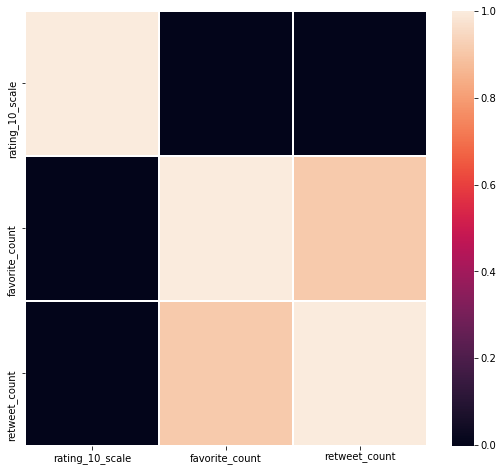

In [194]:
# Creating a smaller df with the numerical values to make a hetmap matrix of the correlations
df_corr_values = df_master[['rating_10_scale', 'favorite_count', 
                               'retweet_count']]

fig, ax = plt.subplots(figsize=(9,8))
correlation = df_corr_values.corr()

sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            ax=ax,
            linewidth= 0.5);

There is no correlation between rating and favorite count and retweet count, which is absoluteli makes sense as rating is "only" part of the site's joke and can be absolutely random, not reflecting any particular meaning. However, we can find a correlation between favorite count and retweet count. That can be considered normal as more retweet means more favorites.

I would like to find the most popular and loved dog breeds. As rating has not anything to do with popularity, I will rate popularity by retweets and favorites, assuming that the cuter the dog breed is the higher the retweets are.

At first, I made a histogram of the most popular dogs on the site to get a closer look. I made a workaround to color the bar borders accoring to this issue: https://github.com/matplotlib/matplotlib/issues/9351/.

II. Most Popular Dog Names on the Account

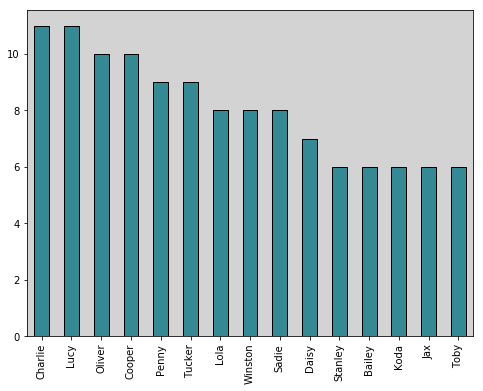

In [195]:
fig, ax = plt.subplots(figsize=(8,6))

names = df_master['dog_name']
names.value_counts().head(15).plot(kind = 'bar', color = "#348A94", ax = ax, edgecolor = ['Black']*len(names))
ax.set_facecolor('#D3D3D3')
plt.show();

# II. Most Beloved Breeds

After that, I analyzed the relationship between the numbers of favorite and dog breeds to find out which dog breeds are the most beloved by the users. I used the most relevant results of the machine learning values, categorized the dog breeds based on pictures. According to my results, golden retrivers are the all time favorites among the users with more than 1600000 favorites, the second and third breeds are labrador retrievers (about 1100000 favorites) and pembrokes (about 1000000 favorites).

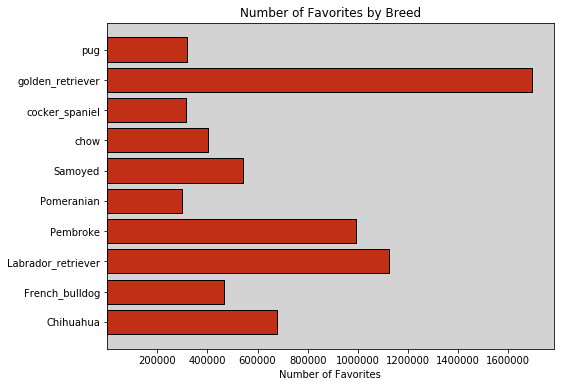

In [196]:
# Creating a favorite dataframe by the groupped breeds, counted the favorites.
df_favorite = df_master.groupby('p1')['favorite_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('favorite_count', ascending=False).head(10)
ser_fav = df_sorted['favorite_count']
ser_breed = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(ser_breed, ser_fav, color = "#C13016", edgecolor = ['Black']*len(ser_breed))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')
plt.xticks(np.arange(200000, 1800000, 200000))
plt.show();

# III. Dog Stages

I analyzed the specific "dog stages", excluding the missing values to make a pie chart about the proportions of the categories. The most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%). The account owners use the words puppo and floofer in 10% of the cases alltogether.

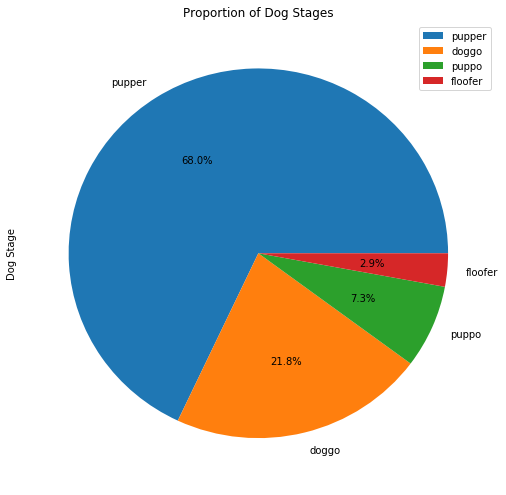

In [197]:
# Exclude the cases where the dog stage is missing.
df_stage = df_master[df_master['dog_stage'] != "None"]
fig, ax = plt.subplots(figsize=(8.5,8.5))

df_stage['dog_stage'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

# IV. Ratings
I analyzed the portions of the ratings. I decided to use the qcut function to make the parts of the piechart almost equial and better readable. I gave the categories funny names to emphasize that higher rating often means cuter dogs. According to the results, most of the dogs are rated between 0 and 13, only 3% of the dogs are rated higher than 13. However, the highest rate is 1776! The numerators exceed the nominators in 40% of the cases, 40% of the dogs have higher ratings that 10.

In [198]:
# Exclude the negative or null values from the dataframe
df_cuteness = df_master[df_master['rating_10_scale'] > 0]

In [199]:
cute_label = ['Nice Dog (0.999, 9.0]', 'Pretty (9.0, 10.0]', 'Cute (10.0, 11.0]', 'Wonderful (11.0, 12.0]', 'Can I Pet this dog?  (12.0, 13.0]', 'Gorgeous (13.0, 1776.0]']

cute_bins = pd.qcut(df_cuteness['rating_10_scale'], 6, labels = cute_label)

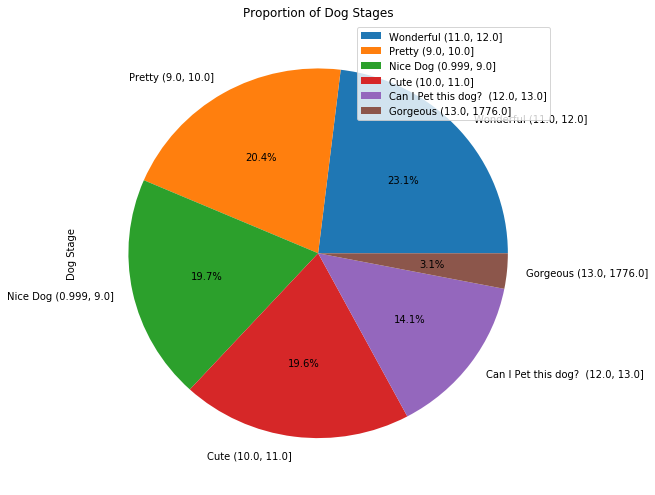

In [200]:
fig, ax = plt.subplots(figsize=(8.5,8.5))
cute_bins.value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();